# Demostration for Calibration


In [137]:
def project_to_top(img, ref_pts, ref_pts_top, warped_size=10000):
    H, W, C = img.shape
    ref_pts = ref_pts.astype(np.float32)
    ref_pts_top = ref_pts_top.astype(np.float32)

    M = cv2.getPerspectiveTransform(ref_pts, ref_pts_top)
    # invert_M = cv2.getPerspectiveTransform(pts2, ref_pts)

    dst = cv2.warpPerspective(img, M, (int(W), int(H)),borderValue =(0, 255, 0)) #(center_w*2, center_h*2)
    
    
    return dst#[int(start_H_top):, int(start_W_top):]

In [128]:
def detect_square_marker(img, blur_ksize = 11, canny_th1=10, canny_th2=200, contour_h= 30, contour_w=30):
    # convert to gray scale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (blur_ksize, blur_ksize), 0)
    gray[gray==np.max(gray)]=255
    # convert to binary edge map
    edges = cv2.Canny(gray, canny_th1, canny_th2)
    # find square contours
    contours, hierarchy = cv2.findContours(edges, mode=cv2.RETR_EXTERNAL, method=cv2.CHAIN_APPROX_SIMPLE)
    # loop over the contours
    total = 0
    squares = []
   
    for c in contours:
        # approximate the contour
        peri = cv2.arcLength(c, True)
        approx = cv2.approxPolyDP(c, 0.02 * peri, True)

        # if the approximated contour has four points, and the height/width larger than a threshold,
        # then assume that the contour is the reference square
        approx_w, approx_h = np.std(approx[:, 0, :], axis=0) # use std as the approximated size of the contour
        if len(approx) == 4 and approx_h > contour_h and approx_w > contour_w:
            squares.append(approx)

    return squares

In [140]:
import numpy as np

# ref_pts_top = np.array([ [1000, 1500], [1500, 1500], [1500, 1000], [1000, 1000]], np.int32)
ref_pts_top = np.array([ [1000, 1000], [1500, 1000], [1500, 500], [1000, 500]], np.int32)

## Case 1: for a square around the pole



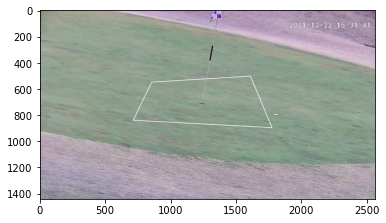

In [130]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

ref_pts = np.array([ [712, 839], [1773, 896], [1607, 503], [853, 549]], np.int32)


img = cv2.imread('E:/dataset/golf/sample_video_frames/14-HinO_2/0025.jpg')
img1 = img.copy()
img1 = cv2.polylines(img1,[ref_pts],True,(250,250,250), thickness=3)
plt.imshow(img1)
plt.show()


In [125]:
cv2.imwrite('E:/dataset/golf/test_markers/front1.jpg', img1)

True

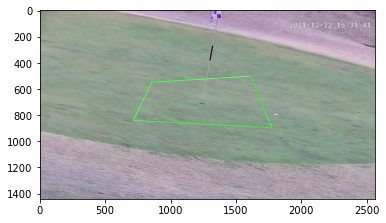

In [131]:
squares = detect_square_marker(img1, blur_ksize = 11, canny_th1=10, canny_th2=20, contour_h= 30, contour_w=30)
for square in squares:
    cv2.drawContours(img1, [square], -1, (0, 255, 0), 4)
plt.imshow(img1)
plt.show()

In [132]:
cv2.imwrite('E:/dataset/golf/test_markers/detect1.jpg', img1)

True

Warp to the top view

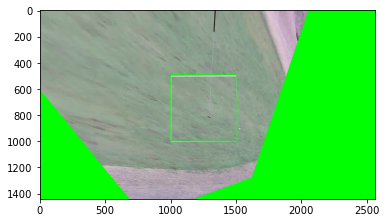

In [141]:
top_img1 = project_to_top(img1, ref_pts, ref_pts_top, warped_size=10000)
plt.imshow(top_img1)
plt.show()

In [142]:
cv2.imwrite('E:/dataset/golf/test_markers/top1.jpg', top_img1)

True

##  Case 2: The reference square is not around the pole

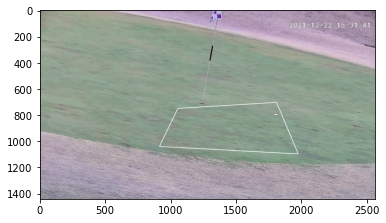

In [95]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

shift_x, shift_y = 200, 200
ref_pts = np.array([ [712 + shift_x, 839 + shift_y],
                     [1773 + shift_x, 896 + shift_y],
                     [1607 + shift_x, 503 + shift_y],
                     [853 + shift_x, 549 + shift_y]], np.int32)


img = cv2.imread('E:/dataset/golf/sample_video_frames/14-HinO_2/0025.jpg')
img2 = cv2.polylines(img,[ref_pts],True,(250,250,250), thickness=3)
plt.imshow(img2)
plt.show()

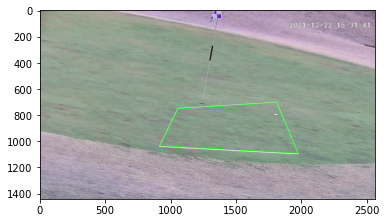

In [96]:
squares = detect_square_marker(img2, blur_ksize = 11, canny_th1=10, canny_th2=20, contour_h= 30, contour_w=30)
for square in squares:
    cv2.drawContours(img2, [square], -1, (0, 255, 0), 4)
plt.imshow(img2)
plt.show()

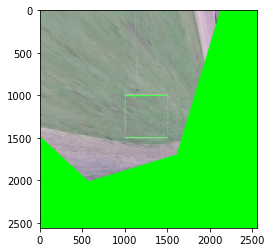

In [97]:
top_img2 = project_to_top(img2, ref_pts, ref_pts_top, warped_size=10000)
plt.imshow(top_img2)
plt.show()

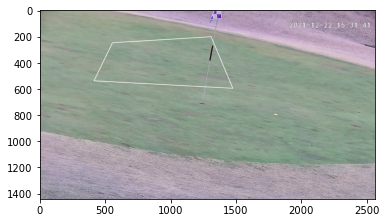

True

In [152]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

shift_x, shift_y = -300, -300
ref_pts = np.array([ [712 + shift_x, 839 + shift_y],
                     [1773 + shift_x, 896 + shift_y],
                     [1607 + shift_x, 503 + shift_y],
                     [853 + shift_x, 549 + shift_y]], np.int32)


img = cv2.imread('E:/dataset/golf/sample_video_frames/14-HinO_2/0025.jpg')
img3 = cv2.polylines(img,[ref_pts],True,(250,250,250), thickness=3)
plt.imshow(img3)
plt.show()
cv2.imwrite('E:/dataset/golf/test_markers/front3.jpg', img3)

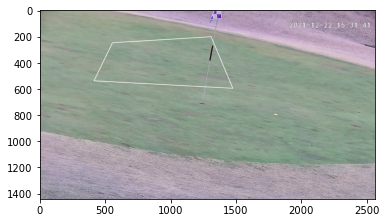

True

In [153]:
squares = detect_square_marker(img3, blur_ksize = 11, canny_th1=10, canny_th2=200, contour_h= 30, contour_w=30)
for square in squares:
    cv2.drawContours(img3, [square], -1, (0, 255, 0), 4)
plt.imshow(img3)
plt.show()
cv2.imwrite('E:/dataset/golf/test_markers/detect3.jpg', img3)

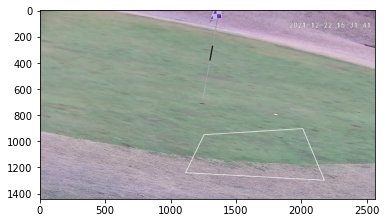

True

In [151]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

shift_x, shift_y = 400, 400
ref_pts = np.array([ [712 + shift_x, 839 + shift_y],
                     [1773 + shift_x, 896 + shift_y],
                     [1607 + shift_x, 503 + shift_y],
                     [853 + shift_x, 549 + shift_y]], np.int32)


img = cv2.imread('E:/dataset/golf/sample_video_frames/14-HinO_2/0025.jpg')
img4 = cv2.polylines(img,[ref_pts],True,(250,250,250), thickness=3)
plt.imshow(img4)
plt.show()
cv2.imwrite('E:/dataset/golf/test_markers/front4.jpg', img4)

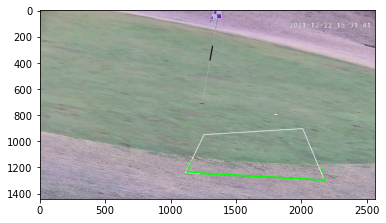

True

In [150]:
squares = detect_square_marker(img4, blur_ksize = 11, canny_th1=10, canny_th2=200, contour_h= 30, contour_w=30)
for square in squares:
    cv2.drawContours(img4, [square], -1, (0, 255, 0), 4)
plt.imshow(img4)
plt.show()
cv2.imwrite('E:/dataset/golf/test_markers/detect4.jpg', img4)

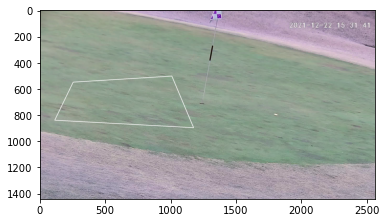

True

In [143]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

shift_x, shift_y = -600, 0
ref_pts = np.array([ [712 + shift_x, 839 + shift_y],
                     [1773 + shift_x, 896 + shift_y],
                     [1607 + shift_x, 503 + shift_y],
                     [853 + shift_x, 549 + shift_y]], np.int32)


img = cv2.imread('E:/dataset/golf/sample_video_frames/14-HinO_2/0025.jpg')
img5 = cv2.polylines(img,[ref_pts],True,(250,250,250), thickness=3)
plt.imshow(img5)
plt.show()
cv2.imwrite('E:/dataset/golf/test_markers/front5.jpg', img5)

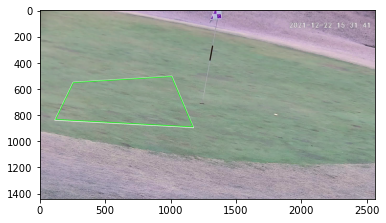

True

In [144]:
squares = detect_square_marker(img5, blur_ksize = 11, canny_th1=10, canny_th2=200, contour_h= 30, contour_w=30)
for square in squares:
    cv2.drawContours(img5, [square], -1, (0, 255, 0), 4)
plt.imshow(img5)
plt.show()
cv2.imwrite('E:/dataset/golf/test_markers/detect5.jpg', img5)

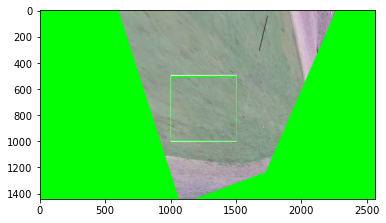

True

In [145]:
top_img5 = project_to_top(img5, ref_pts, ref_pts_top, warped_size=10000)
plt.imshow(top_img5)
plt.show()
cv2.imwrite('E:/dataset/golf/test_markers/top5.jpg', top_img5)

## Case 3: more than one squares are visible on the image

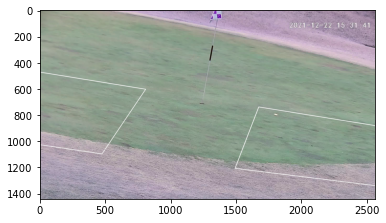

True

In [188]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

shift_x1, shift_y1 = -600, 200
ref_pts1 = np.array([ [12 + shift_x1, 739 + shift_y1],
                     [1073 + shift_x1, 896 + shift_y1],
                     [1407 + shift_x1, 403 + shift_y1],
                     [453 + shift_x1, 249 + shift_y1]], np.int32)
shift_x2, shift_y2 = 900, 200
ref_pts2 = np.array([ [492*1.2 + shift_x2, 839*1.2 + shift_y2],
                     [1773*1.2 + shift_x2, 996*1.2 + shift_y2],
                     [1607*1.2 + shift_x2, 603*1.2 + shift_y2],
                     [643*1.2 + shift_x2, 449*1.2 + shift_y2]], np.int32)

ref_pts = np.array([ [1073 + shift_x1, 896 + shift_y1],
                    [492*1.2 + shift_x2, 839*1.2 + shift_y2],
                     [643*1.2 + shift_x2, 449*1.2 + shift_y2],
                     [1407 + shift_x1, 403 + shift_y1]], np.int32)


img = cv2.imread('E:/dataset/golf/sample_video_frames/14-HinO_2/0025.jpg')
img6 = cv2.polylines(img,[ref_pts1],True,(250,250,250), thickness=3)
img6 = cv2.polylines(img6,[ref_pts2],True,(250,250,250), thickness=3)
plt.imshow(img6)
plt.show()
cv2.imwrite('E:/dataset/golf/test_markers/front6.jpg', img6)

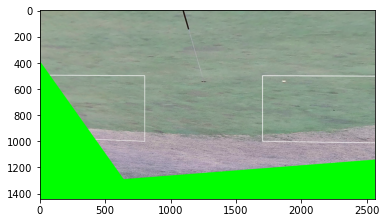

True

In [189]:
ref_pts_top = np.array([ [800, 1000], [1700, 1000], [1700, 500], [800, 500]], np.int32)
top_img6 = project_to_top(img6, ref_pts, ref_pts_top, warped_size=10000)
plt.imshow(top_img6)
plt.show()
cv2.imwrite('E:/dataset/golf/test_markers/top6.jpg', top_img6)